# Importing data and libraries


In [ ]:
import os
from IPython.display import clear_output
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/COVID19_Tweets'
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
current directory is : /content/gdrive/My Drive/COVID19_Tweets


In [ ]:
!pip install demoji
!pip install emojis
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=8480400574ef9e0ea003d8f3b09e38a7b185935ae59274c6ae9f2a976004f38a
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import emoji
import emojis
import demoji
import pandas as pd
from emoji.core import emoji_list
import json
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt
import calendar
import numpy as np
import collections
import seaborn as sns

In [ ]:
df = pd.read_csv("verzija2.csv")
df = df.drop('Unnamed: 0', axis=1)
df.dropna(subset=['created_at'], inplace=True)
df.dropna(subset=['id'], inplace=True)
df.dropna(subset=['full_text'], inplace=True)
df.dropna(subset=['source'], inplace=True)
df.dropna(subset=['user'], inplace=True)
df.dropna(subset=['entities'], inplace=True)
df.dropna(subset=['lang'], inplace=True)

In [ ]:
df.shape

(131699, 7)

# New columns

In [ ]:
def extract_emojis_list(text):
    my_emoji_list = demoji.findall_list(text, desc=False)
    return my_emoji_list

def extract_distincs_emojis_list(text):
    emojis = emoji.distinct_emoji_list(text)
    return emojis

def emoji_count(text):
    count = emoji.emoji_count(text, False)
    return count

def distinct_emoji_count(text):
    count = emoji.emoji_count(text, True)
    return count


df['emoji_list'] = df['full_text'].apply(lambda x: extract_emojis_list(x))
df['distinct_emojis'] = df['full_text'].apply(lambda x: extract_distincs_emojis_list(x))
df['emoji_count'] = df['full_text'].apply(lambda x: emoji_count(x))
df['distinct_emoji_count'] = df['full_text'].apply(lambda x: distinct_emoji_count(x))

In [ ]:
def extract_hashtags(text):
  try:
    text = text.replace("'", "\"")
    json_object = json.loads(text)
    hashtags = ([hashtag['text'] for hashtag in json_object['hashtags']])
    return hashtags
  except Exception as e:
    return []

df['hashtags'] = df['entities'].apply(lambda x: extract_hashtags(x))


In [ ]:
def extract_urls(text):
  try:
    text = text.replace("'", "\"")
    json_object = json.loads(text)
    return len(json_object['urls'])
  except Exception as e:
    return 0

df['url_count'] = df['entities'].apply(lambda x: extract_urls(x))

In [ ]:
def tweet_stats(text):
  tokenizer = RegexpTokenizer(r'\w+')
  text = re.sub(r'\\[uU][\da-fA-F]{4}', '', text)
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  tokens = tokenizer.tokenize(text)
  num_words = len(tokens)
  avg_word_len = sum(len(word) for word in tokens) / num_words if num_words > 0 else 0
  return pd.Series({'num_words': num_words, 'avg_word_len': avg_word_len})

df[['num_words', 'avg_word_len']] = df['full_text'].apply(tweet_stats)

In [ ]:
text = ':(('
emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
print(emoticons)

[':(']


In [ ]:
def extract_emoticons(text):
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

    return pd.Series({'emoticons': emoticons, 'num_of_emoticons': len(emoticons)})

df[['emoticons', 'num_of_emoticons']] = df['full_text'].apply(extract_emoticons)

In [ ]:
df['dots'] = df['full_text'].str.count(r'\.')
df['commas'] = df['full_text'].str.count(r',')
df['exclamation_marks'] = df['full_text'].str.count(r'!')
df['question_marks'] = df['full_text'].str.count(r'\?')
df['capital_letters_percentage'] = df['full_text'].str.count(r'[A-Z]').div(df['full_text'].str.len())

In [ ]:
df['day_of_week'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y').dt.day_name()

In [ ]:
df.head()

created_at                   id  \
0  Sat Jan 01 20:30:59 +0000 2022  1477376831305228296   
1  Sun Jan 02 04:18:58 +0000 2022  1477494600969654275   
2  Sun Jan 02 15:38:05 +0000 2022  1477665509302620167   
3  Wed Jan 05 11:21:27 +0000 2022  1478688089245683713   
4  Wed Jan 05 15:04:38 +0000 2022  1478744252142297093   

                                           full_text  \
0  Wow je vois partout qu’elle est décédée💔 wow !...   
1  @29Utd Its not his problem that you don't have...   
2  RT Covid19 Stats, 🏴󠁧󠁢󠁷󠁬󠁳󠁿󠁧󠁢󠁷󠁬󠁳󠁿 Wales Coronavi...   
3                    🤣🤣🤣🤣🤣🤣🤣 https://t.co/MAmfR6lhoT   
4  @ronniebooks Y DESPUES SE BESAN ELLOS QUE HERM...   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://dlvrit.com/" rel="nofollow">d...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                                user  \
0  {'id': 2555244584, 'id_str': '2555244584', 'na...   
1  {'id': 1267670061189382144, 'id_str': '1267670...   
2  {'id': 1382431445063495688, 'id_str': '1382431...   
3  {'id': 1416357782886957056, 'id_str': '1416357...   
4  {'id': 729671602204368896, 'id_str': '72967160...   

                                            entities lang  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   fr   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   en   
2  {'hashtags': [{'text': 'coronavirus', 'indices...   en   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  art   
4  {'hashtags': [], 'symbols': [], 'user_mentions...   es   

              emoji_list distinct_emojis  emoji_count  ...  num_words  \
0                    [💔]             [💔]            1  ...       12.0   
1                 [😭, 😭]             [😭]            2  ...       33.0   
2              [🏴󠁧󠁢󠁷󠁬󠁳󠁿]       [🏴󠁧󠁢󠁷󠁬󠁳󠁿]            1  ...       30.0   
3  [🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣]             [🤣]            7  ...        0.0   
4                    [🥺]             [🥺]            1  ...       24.0   

  avg_word_len  emoticons  num_of_emoticons  dots commas  exclamation_marks  \
0     4.083333         []                 0     2      0                  1   
1     4.575758         []                 0     1      0                  0   
2     5.100000         []                 0     3      2                  0   
3     0.000000         []                 0     1      0                  0   
4     4.708333         []                 0     0      0                  0   

   question_marks  capital_letters_percentage  day_of_week  
0               0                    0.053763     Saturday  
1               0                    0.010526       Sunday  
2               0                    0.078431       Sunday  
3               0                    0.129032    Wednesday  
4               0                    0.226950    Wednesday  

[5 rows x 23 columns]

In [ ]:
df.loc[[0, 2, 3, 4, 42, 704], ['num_words', 'avg_word_len', 'dots', 'commas', 'exclamation_marks', 'question_marks', 'capital_letters_percentage']]


num_words  avg_word_len  dots  commas  exclamation_marks  question_marks  \
0         17.0      4.176471     2       0                  1               0   
2         39.0      4.846154     3       2                  0               0   
3          4.0      4.500000     1       0                  0               0   
4         24.0      4.791667     0       0                  0               0   
42         9.0      4.111111     1       0                  3               0   
704       19.0      5.210526     0       0                  0               0   

     capital_letters_percentage  
0                      0.053763  
2                      0.078431  
3                      0.129032  
4                      0.226950  
42                     0.047619  
704                    0.000000

In [ ]:
print(df['full_text'][0])
print(df['full_text'][2])
print(df['full_text'][3])
print(df['full_text'][4])
print(df['full_text'][42])
print(df['full_text'][704])

Wow je vois partout qu’elle est décédée💔 wow ! Que Dieu nous protège. https://t.co/z1psRmXf0z
RT Covid19 Stats, 🏴󠁧󠁢󠁷󠁬󠁳󠁿󠁧󠁢󠁷󠁬󠁳󠁿 Wales Coronavirus (COVID-19) weekly overview of deaths of people who have died within 28 days of a first positive test, by date reported. #coronavirus #Wales #Corona #covid19… https://t.co/k1BSZ2HZXh https://t.co/fsChgu0o83
🤣🤣🤣🤣🤣🤣🤣 https://t.co/MAmfR6lhoT
@ronniebooks Y DESPUES SE BESAN ELLOS QUE HERMOSOS 🥺 excepto pq después aparece una foto de Henry con una rubia maldita corona déjenlo en paz
Get well soon my friend!!! 🔥🔥🔥💪💪💪❤️❤️❤️ https://t.co/wtCUyg23ud
@creamilktea halaaa :(( huhu doble ingat talaga 😭 halos pareho rin symptoms ng flu and covid kaya endi pwede maging kampante 😭


In [ ]:
emoji.demojize(df['full_text'][704])

'@creamilktea halaaa :(( huhu doble ingat talaga :loudly_crying_face: halos pareho rin symptoms ng flu and covid kaya endi pwede maging kampante :loudly_crying_face:'

In [ ]:
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp

--2023-05-31 19:20:26--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40906 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine.mplstyle’

rose-pine.mplstyle  100%[===================>]  39.95K  --.-KB/s    in 0.003s  

2023-05-31 19:20:27 (12.1 MB/s) - ‘/tmp/rose-pine.mplstyle’ saved [40906/40906]

--2023-05-31 19:20:27--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
df.to_csv("verzija3.csv")

# Analysis

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df.drop(['created_at', 'id', 'full_text', 'source', 'user', 'entities', 'distinct_emojis', 'lang',	'emoji_list', 'distinct_emojis', 'day_of_week', 'emoticons'],axis=1),width=1200, height=1600)
fig.show()


In [ ]:
plt.style.use('ggplot')
colors = sns.color_palette('deep')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131699 entries, 0 to 131707
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_at                  131699 non-null  object 
 1   id                          131699 non-null  object 
 2   full_text                   131699 non-null  object 
 3   source                      131699 non-null  object 
 4   user                        131699 non-null  object 
 5   entities                    131699 non-null  object 
 6   lang                        131699 non-null  object 
 7   emoji_list                  131699 non-null  object 
 8   distinct_emojis             131699 non-null  object 
 9   emoji_count                 131699 non-null  int64  
 10  distinct_emoji_count        131699 non-null  int64  
 11  hashtags                    131699 non-null  object 
 12  url_count                   131699 non-null  int64  
 13  num_words     

In [ ]:
print("emoji_count ", df["emoji_count"].mean())
print("distinct_emoji_count ", df["distinct_emoji_count"].mean())
print("hashtags ", df["hashtags"].str.len().mean())
print("url_count ", df["url_count"].mean())
print("num_words ", df["num_words"].mean())
print("avg_word_length ", df["avg_word_len"].mean())
print("num_of_emoticons ", df["num_of_emoticons"].mean())
print("dots ", df["dots"].mean())
print("commas ", df["commas"].mean())
print("exclamation_marks ", df["exclamation_marks"].mean())
print("question_marks ", df["question_marks"].mean())
print("capital_letters_percentage ", df["capital_letters_percentage"].mean())

emoji_count  2.074396920249964
distinct_emoji_count  1.4168824364649693
hashtags  0.46817363837234904
url_count  0.4383024928055642
num_words  23.775169135680606
avg_word_length  4.720328485614835
num_of_emoticons  0.0023082939126341127
dots  1.6410527035133144
commas  0.6192833658569921
exclamation_marks  0.25114085908017525
question_marks  0.16671349061116636
capital_letters_percentage  0.08054379314888221


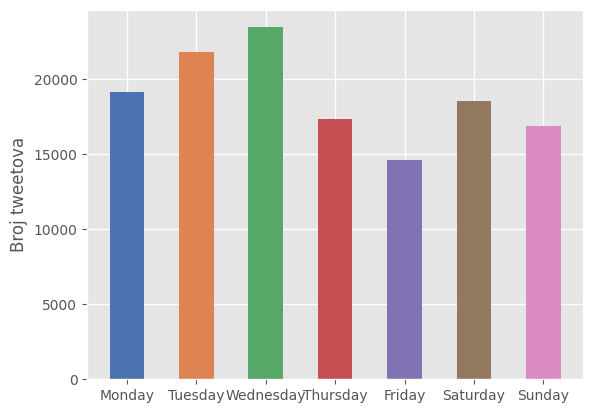

In [ ]:
day_counts = df['day_of_week'].value_counts().sort_index()

# Define the order of days of the week
order = list(calendar.day_name)

# Reindex the day_counts using the defined order
day_counts = day_counts.reindex(order)

# Plot the bar chart
plt.bar(day_counts.index, day_counts.values, color=colors[:7], width=0.5)


plt.ylabel('Broj tweetova')

plt.show()

In [ ]:
df['lang'].nunique()

34

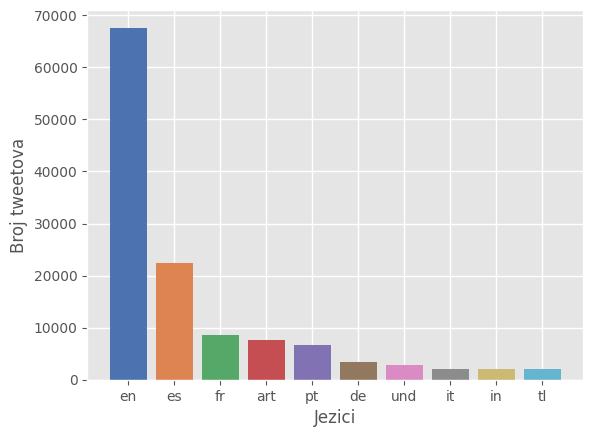

In [ ]:
import matplotlib.pyplot as plt
import collections
counter = collections.Counter(df['lang'])

# Get the top 10 items
top_items = counter.most_common(10)

# Extract the labels and counts for the bar chart
labels = [item[0] for item in top_items]
counts = [item[1] for item in top_items]

# Create a bar chart
plt.bar(labels, counts, color=colors[:10])

# Add title and labels to the plot

plt.xlabel('Jezici')
plt.ylabel('Broj tweetova')

# Display the plot
plt.show()

('😂', '🤣', '😭', '👇', '🤔', '🤡', '🙏', '🙄', '😷', '💉', '👏', '🥺', '❤️', '👍', '🦠') (21274, 15374, 12695, 6942, 5740, 5382, 5081, 4912, 4434, 3653, 3255, 2888, 2844, 2703, 2628)


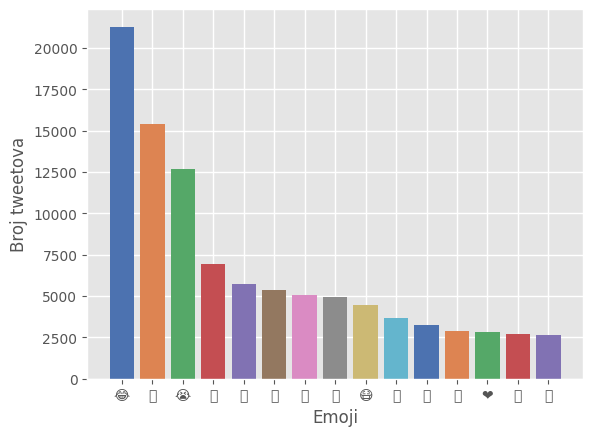

In [ ]:
# Flatten the list of emojis
all_emojis = [emoji for emojis in df['emoji_list'] for emoji in emojis]

# Count the occurrences of each emoji
emoji_counts = collections.Counter(all_emojis)

# Get the top 10 most common emojis
top_10_emojis = emoji_counts.most_common(15)

# Extract the emojis and their counts
top_10_emojis, counts = zip(*top_10_emojis)

print(top_10_emojis, counts)

# Plot the bar chart
plt.bar(top_10_emojis, counts, color=colors[:10])

# Customize the plot
plt.xlabel('Emoji')
plt.ylabel('Broj tweetova')

# Display the plot
plt.show()

In [ ]:
emoji.demojize(top_10_emojis)

':face_with_tears_of_joy::rolling_on_the_floor_laughing::loudly_crying_face::backhand_index_pointing_down::thinking_face::clown_face::folded_hands::face_with_rolling_eyes::face_with_medical_mask::syringe::clapping_hands::pleading_face:❤️:thumbs_up::microbe:'

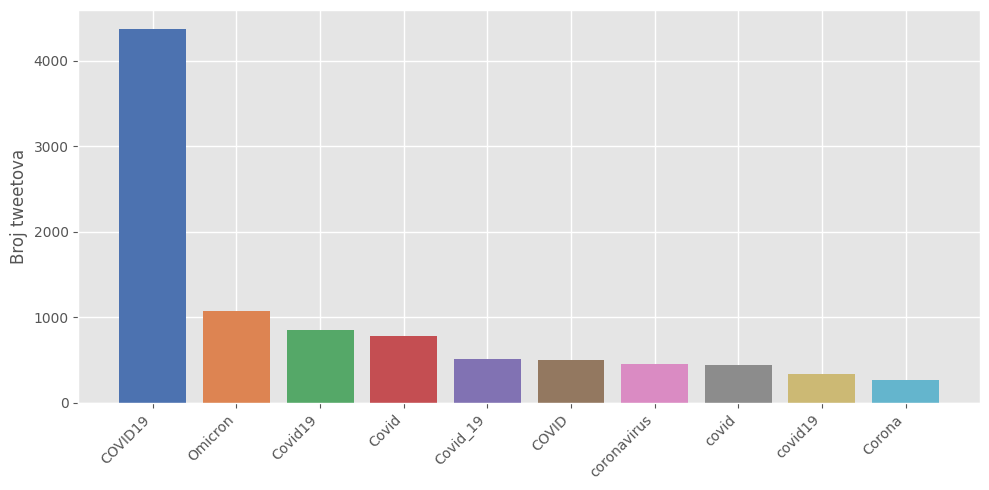

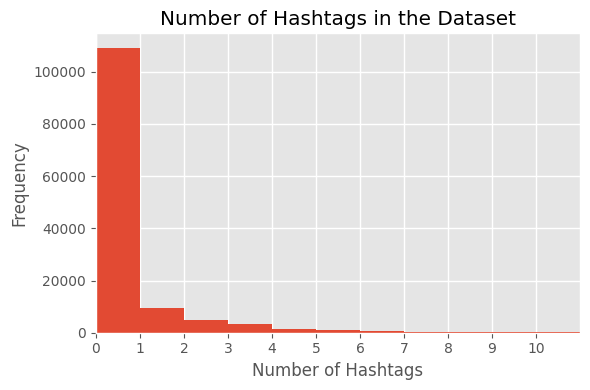

In [ ]:
# Flatten the list of hashtags
all_hashtags = [tag for hashtags in df['hashtags'] for tag in hashtags]

# Count the occurrences of each hashtag
hashtag_counts = collections.Counter(all_hashtags)

# Get the top 10 most common hashtags
top_10_hashtags = hashtag_counts.most_common(10)

# Extract the hashtags and their counts
hashtags, counts = zip(*top_10_hashtags)

# Plot the bar chart for the most common hashtags
plt.figure(figsize=(10, 5))
plt.bar(hashtags, counts, color=colors[:10])

plt.ylabel('Broj tweetova')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar chart for the number of hashtags in the dataset
plt.figure(figsize=(6, 4))
num_hashtags = [len(hashtags) for hashtags in df['hashtags']]
unique_hashtags = len(hashtag_counts)
plt.hist(num_hashtags, bins=range(max(num_hashtags)+2))
plt.xlabel('Number of Hashtags')
plt.ylabel('Frequency')
plt.title('Number of Hashtags in the Dataset')
plt.xticks(range(11))
plt.xlim(0, 11)
plt.tight_layout()
plt.show()

In [ ]:
df1 = df

df1['full_text'] = df1['full_text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

# Remove emojis
df1['full_text'] = df1['full_text'].str.encode('ascii', 'ignore').str.decode('ascii')

# Remove punctuation
df1['full_text'] = df1['full_text'].str.replace(r'[^\w\s]', '')

# Convert text to lowercase
df1['full_text'] = df1['full_text'].str.lower()

text = df1['full_text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


<ipython-input-40-19d956059b74>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['full_text'] = df1['full_text'].str.replace(r'[^\w\s]', '')


NameError: ignored